# Week 8 - Support Vector Machines
## Exercise Answers

In [1]:
%matplotlib inline

import os # locating directories

import numpy as np   # Arrays
import pandas as pd  # DataFrames

# Plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120
import seaborn as sns; sns.set()

from sklearn.datasets import load_iris           # for the Iris data
from IPython.display import Image                # displaying .png images
from sklearn.svm import SVC, LinearSVC           # SVM
from mpl_toolkits.mplot3d import Axes3D          # 3d plots
from sklearn.preprocessing import StandardScaler # scaling features
from sklearn.preprocessing import LabelEncoder   # binary encoding

# colours for print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
image_dir = os.path.join(os.getcwd(),"Images")

iris = load_iris(as_frame=True)  # data stored in a `sklearn.utils.Bunch`
iris_df = iris['data']           # get features DataFrame
target = iris['target']          # get target Series
# get the labels of flowers capitalised for visualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))
# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))
# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)
# Capitalize column names for plotting
iris_vis.columns = [x.capitalize() for x in list(iris_vis.columns)]

## Question 1.
What is the fundemental idea behind "Maximal Margin Classifiers" (as well as their extensions "Support Vector Classifier" and "Support Vector Machines")?

### Answer

The fundamental idea behind Maximal Margin Classifiers is to fit the widest possible margin between the classes. In other words, the goal is to have the largest possible "street" between the decision boundary that separates the two classes and the training instances.

## Question 2.
What is a support vector?

### Answer

After training an SVM, a support vector is any instance located on the margin (see the previous answer), or between them when using soft margins (see later question). The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector has no influence on the decision boundary. Computing the predictions only involves the support vectors, not the whole training set.

## Question 3.
In the plot below, which points are the "support vectors"?

### Answer
It uses more than 1 here for each class, although which ones are quite tricky to discern. Don't worry if you got a few of the blue points wrong here as it was tricky, the main thihng to note is that it can be more than one point!

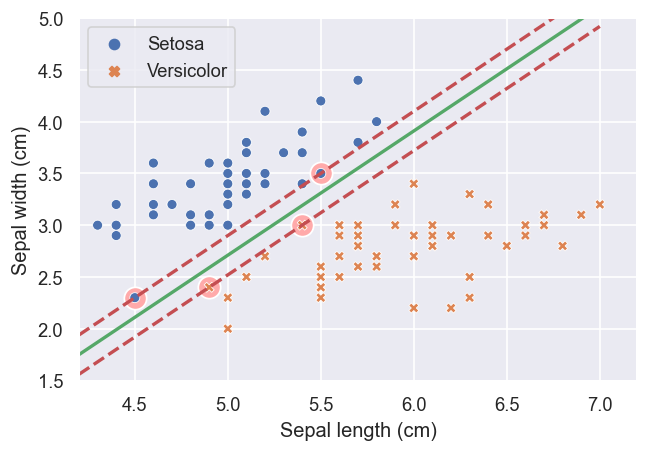

In [2]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def svc_decision_boundary(clf, xmin=0, xmax=5.5, highlight=True, axes_limit = [0, 5.5, 0, 2]):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    if highlight:
        g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "r--", linewidth=2)
    plt.plot(x0, gutter_down, "r--", linewidth=2)
    
    plt.axis(axes_limit)


exersise_ = iris_vis[["Sepal length (cm)", "Sepal width (cm)", "Target"]]
exersise_ = exersise_[exersise_.Target != "Virginica"]

X = exersise_[["Sepal length (cm)", "Sepal width (cm)"]].values
y = le.transform(exersise_[["Target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
svc_decision_boundary(svm_clf, 4.2, 7, axes_limit = [4.2, 7.2, 1.5, 5]
                     )
g = sns.scatterplot(data=exersise_, x = "Sepal length (cm)", 
                y = "Sepal width (cm)", hue="Target", 
                style = "Target")
g.axes.get_legend().set_title(False)

## Question 4.

Sketch or code (using Python) the following two dimensional hyperplanes, indicating where $1 + 3X_1 - X_2 > 0$ and where $1 + 3X_1 - X_2 < 0$.

a. $1 + 3X_1 - X_2 = 0$

b. $-2 + X_1 + 2X_2 = 0$

### Answer

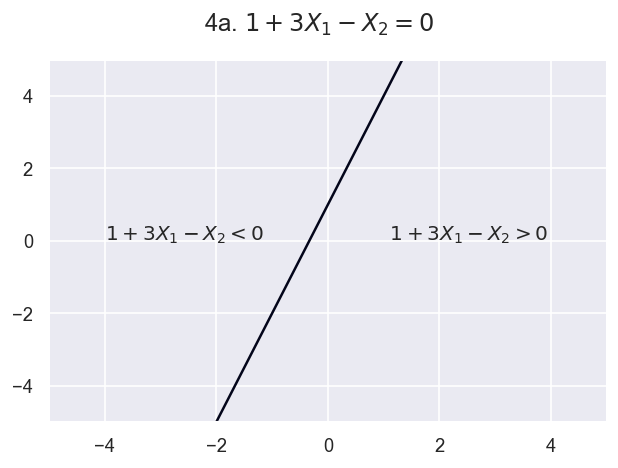

In [6]:
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
a = 1 + 3*X1 -X2
plt.contour(X1, X2, a, [0])
plt.text(-4, 0, "$1 + 3X_1 - X_2 < 0$")
plt.text(1, 0, " $1 + 3X_1 - X_2 > 0$")

plt.suptitle("4a. $1 + 3X_1 - X_2 = 0$")

plt.show()

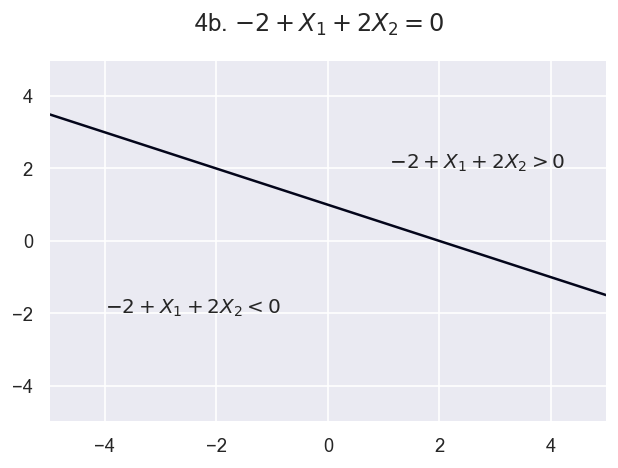

In [9]:
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
b = -2 + X1 + 2*X2
plt.contour(X1, X2, b, [0])
plt.text(-4, -2, "$-2 + X_1 + 2X_2 < 0$")
plt.text(1, 2, " $-2 + X_1 + 2X_2 > 0$")

plt.suptitle("4b. $-2 + X_1 + 2X_2 = 0$")

plt.show()

## Question 5. 

Fundamentally, how are "Support Vector Classifier" and "Support Vector Machines" extensions of "Maximal Margin Classifiers"?

### Answer

When using a Support Vector Classifier (or soft margin classification), the SVC searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). 

Support Vector Machines use kernels when training on nonlinear datasets.

## Question 6. 

If $C$ is large for a support vector classifier in Scikit-Learn, will there be more or less support vectors than if $C$ is small? Explain your answer.

### Answer
When the tuning parameter $C$ is large in Scikit-Learn, then there are __less__ support vectors, meaning less observations are involve in determining the hyperplane. The strength of the regularization is inversely proportional to $C$, meaning a large $C$ has a higher penelty.

## Question 7.
Is the "confidence score" output from a SVM classifier the same as a probability?

### Answer
No, the output of the SVM, the distance between the test instance and the decision boundary, cannot be directly converted into an estimation of the class probability. 

__Note__
If you set `probability=True` when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the `predict_proba()` and `predict_log_proba()` methods to the SVM.

## Question 8.
Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $\gamma$ (`gamma`) and/or $C$?

### Answer
If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase `gamma` or `C` (or both).

In [5]:
# Convert to pdf without code showing
!jupyter nbconvert ./SVM_Exercise_Answers.ipynb --to=pdf --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook ./SVM_Exercise_Answers.ipynb to pdf
[NbConvertApp] Support files will be in SVM_Exercise_Answers_files\
[NbConvertApp] Making directory .\SVM_Exercise_Answers_files
[NbConvertApp] Making directory .\SVM_Exercise_Answers_files
[NbConvertApp] Making directory .\SVM_Exercise_Answers_files
[NbConvertApp] Writing 23475 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 122603 bytes to SVM_Exercise_Answers.pdf
